# Used Cars

Used Cars skup podataka sadrži informacije o prodaji automobila koje pruža Craigslist.
Više informacija je moguće pronaći na: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# mozes napravit specijalno rjesenja za npr samo toyotu

## Učitavanje podataka

Na samom početku je potrebno učitati podatke i pogledati od kojih se stupaca sastoji te kakve se informacije u njima pružaju.

In [75]:
df = pd.read_csv('vehicles.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Kolonu id postavljam kao index skupa podataka.

In [76]:
df = df.set_index('id')

Postoje retci koji se sastoje od mnogo NaN vrijednosti pa ćemo takve ukloniti jer nema smisla raditi prekciju nad podacima koji su većinski imputirani.

In [77]:
nan_cnt = df.isnull().sum(axis=1)

idx = nan_cnt < 8
df = df[idx]

In [78]:
df.shape

(390742, 25)

In [83]:
df.describe()

,price,year,odometer,county,lat,long
count,6.377600e+04,63776.000000,6.324700e+04,0.0,62950.000000,62950.000000
mean,3.692480e+04,2010.869763,1.037517e+05,NaN,38.788844,-95.370710
std,4.399714e+06,10.794611,1.920003e+05,NaN,5.863687,18.053911
min,0.000000e+00,1913.000000,0.000000e+00,NaN,-0.110958,-159.530300
25%,6.800000e+03,2008.000000,4.537900e+04,NaN,34.892100,-112.245386
50%,1.595000e+04,2014.000000,9.481200e+04,NaN,39.531219,-89.943849
75%,2.959000e+04,2017.000000,1.404430e+05,NaN,42.756205,-81.367592
max,1.111111e+09,2022.000000,1.000000e+07,NaN,76.714376,94.163200


Vidimo da postoje cijene koje su nerealno velike. Također postoje cijene poput 123456789 koje izgledaju sasvim nasumičnim. Ovakve su greške mogle nastatiti pogreškom u scrapingu ili pogrešnim unosom u bazu podataka.  Uklonit ću sve cijene koje su veće od 10 000 000 kako bi uklonili outliere is skupa. Također postoje retci u kojima je cijena automobila manja od 100 ili čak 0. Vjerojatno su ovakvi rezultati također nastali greškom jer ne postoje automobili na Craigslistu koji se prodaju po cijeni 0, pa ću i njih ukloniti.

Iz podataka o distribuciji možemo uočiti da kolona price sadrži outliere pa je njih potrebno maknuti iz skupa podataka.

In [84]:
price_sorted = df['price'].sort_values(ascending=False)
price_sorted.head(50)

id
7305265540    1111111111
7317067334        999999
7316352222        225000
7313852214        225000
7316240854        213000
7315904521        175000
7310531509        150000
7314985804        135000
7316206367        125000
7314829807        123456
7316935761        119999
7309746801        119999
7311856070        119995
7315954519        119995
7309945912        119900
7309389841        119900
7312903257        119888
7306896169        116000
7311596305        112500
7312866001        110000
7315301205        107999
7314085180        103500
7305712270        102999
7308288624        102900
7312900675        100995
7314759510        100995
7309906351        100995
7308821737        100995
7306824123        100000
7317034296         99999
7315009609         99999
7316789567         99888
7315520204         99888
7315632211         99700
7316386358         99000
7316388850         99000
7315923139         98750
7316342215         97900
7307730715         97500
7315350737         959

In [85]:
df = df[df['price'] < 10000000]
df = df[df['price'] > 100]
df.describe()

,price,year,odometer,county,lat,long
count,58138.000000,58138.000000,5.786700e+04,0.0,57614.000000,57614.000000
mean,21393.866060,2010.577608,1.050389e+05,NaN,38.792478,-94.915228
std,16593.864513,11.030882,1.884761e+05,NaN,5.873017,17.789943
min,101.000000,1913.000000,0.000000e+00,NaN,-0.110958,-159.530300
25%,8900.000000,2008.000000,4.619500e+04,NaN,34.950600,-111.924900
50%,17600.000000,2013.000000,9.669400e+04,NaN,39.628043,-89.108146
75%,30590.000000,2017.000000,1.423170e+05,NaN,42.681010,-81.347605
max,999999.000000,2022.000000,1.000000e+07,NaN,76.714376,94.163200


In [86]:
df['manufacturer'].value_counts()

ford    58138
Name: manufacturer, dtype: int64

In [ ]:
df = df[df['manufacturer'] == 'ford']

In [87]:
df.shape

(58138, 25)

## Tipovi podataka

Nakon pregleda podataka, nastavljam sa njihovom obradom. Prvi korak u obradi je pregled tipa stupaca i preoblikovanje tipa ukoliko je to potrebo. Može se vidjeti da je stupac 'year' tipa float64 pa ga je potrebno pretvoriti u tip int64. Također ću izvući broj cilindara iz stringa stupaca cylinders i pretvoriti ga u tip int32 jer model regresije radi samo sa numeričkim vrijednostima.  Na posljetku ću prebaciti stupac 'posting_date' iz object u datetime, a odmah i pretvoriti u numeričku vrijednost tako što ću izračunati koliko je dana prošlo od objva na Craigslistu do danas.

In [88]:
df.dtypes

url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [89]:
df['cylinders'].value_counts()

8 cylinders     17082
6 cylinders     12871
4 cylinders      7483
10 cylinders      916
other             124
3 cylinders       119
5 cylinders        29
12 cylinders        3
Name: cylinders, dtype: int64

In [90]:
from datetime import datetime

df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(pd.Int64Dtype())
df['cylinders'].apply(lambda x: '6 cylinders' if x=='other' else x)
df['cylinders'] = pd.to_numeric(df['cylinders'].apply(lambda x: str(x).split()[0]), errors='coerce').astype(pd.Int32Dtype())
df['posting_date'] = df['posting_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").replace(tzinfo=None))

today = datetime.today()
df['posting_date'] = (today - df['posting_date']).dt.days
df.dtypes

url              object
region           object
region_url       object
price             int64
year              Int64
manufacturer     object
model            object
condition        object
cylinders         Int32
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date      int64
dtype: object

## Odabir značajki

Sve kolone nisu potrebne za predikciju cijene automibila, zbog čega radim novi skup podataka koji će sadržavati podskup kolona originalnog skupa podataka koji bi mogli biti od važnosti u predikciji. Kolona county je izbačena jer sadrži samo NaN vrijednosti. Neke od kolona poput url, region_url, title_status, VIN, image_url, description nisu od koristi u predikciji te nisu uključene u skup podataka koji će se koristiti za trening modela.

In [104]:
df_feat = df.copy()
df_feat = df_feat[['price','year','condition','cylinders','odometer','fuel', 'title_status', 'transmission','drive','size','type','posting_date']]

In [105]:
df_feat.shape

(58138, 12)

## Podjela skupa podataka za fazu treniranja

Prije imputacije nedostajućih vrijednosti, potrebno je podijeliti skup podataka na dijelove. Razlog je to što je potrebno vrijednost kojom će se nedostajeća vrijednost zamijeniti, primjerice prilikom računanja moda, izračunati na skupu podataka na kojem se model trenira jer model ne bi trebao biti svjestan podataka na kojima će se testirati njegove performanse.

Obrađeni je skup podataka potrebno podijelit na više dijelova kako bi se nad njima mogla raditi regresija. Najčešće se skup dijeli na podskup za trening, podskup za validaciju te podskup za test, a može se i dodatno podijeliti na podskup za tuning. Podskup za trening služi za treniranje modela, odnosno podešavanje parametara modela, a podskup za validaciju za usporedbu modela sa različitim hiperparametrima. Ta se usporedba radi na skupu za validaciju koji je različit od skupa za treniranje kako bi se izbjegla pristranost jer statistički gledano nije ispravno mjeriti točnost modela na skupu na kojem je treniran. Slična je uporaba i podskupa za tuning. On se koristi kad postoje hiperparametri na više razina. Podskup za test služi za konačnu evaluaciju modela nakon što su određeni svi parametri i hiperparameteri. Također se originalni skup može podijeliti i na 10 (k) dijelo kad bi se radila 10-fold (k-fold) unakrsna validacija (cross-validation). Nakon što se podese hiperparametri modela, model se trenira na cjelokupnom skupu podataka prije nego se deploy-a.

In [106]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_feat, test_size=0.2, random_state=42)
df_train, df_val =  train_test_split(df_train, test_size=0.2, random_state=42)

## Nedostajuće vrijednosti

In [107]:
df_train.isna().sum()

price               0
year                0
condition       14228
cylinders       12525
odometer          178
fuel              199
title_status      669
transmission      198
drive            7441
size            24655
type             6787
posting_date        0
dtype: int64

Postotak nedostajućih vrijednosti po koloni:

In [108]:
df_train.isna().sum() / len(df_train) * 100

price            0.000000
year             0.000000
condition       38.239088
cylinders       33.662116
odometer         0.478392
fuel             0.534831
title_status     1.798000
transmission     0.532144
drive           19.998387
size            66.262632
type            18.240701
posting_date     0.000000
dtype: float64

Ovaj skup podataka sadrži velik broj nedostajućih vrijednosti te je potrebno proći kolonu po kolonu i odrediti na koji će se način pristupiti imputaciji podataka. Imputacija podataka je bitna jer mnogi regresijski modeli ne mogu baratati sa nedostajućim vrijednostima. Različite se metode koriste ovisno o tome jesu li podaci numerički ili kategoričiki. Ukoliko su podaci numerički, podaci se mogu imputirati tako što se umjesto nedostajuće vrijednosti stavi srednja vrijednost, medijan ili mod. Korištenje medijana i moda ima prednost u tome što na njega ne utječu outlieri koliko na srednju vrijednost. S druge strane, ove metode ne uzimaju u obrzir koreliranost podataka. Također je moguće koristit kNN metodu gdje se nedostajeća vrijednost zamijeni ovisno o primjerima koji su najbliži primjeru koji je u pitanju.

Moguće je i u potpunosti zanemarati neku od kolona ukoliko je broj nedostajućih vrijednosti prevelik. Takav je bio slučaj sa kolonom county kod odabira značajki koja se sastoji iskljčivo od NaN vrijednosti.

Kod kategoričkih varijabli je češće korištenje moda (najčešće vrijednsoti) kao zamjenu za nedostajuće vrijednosti. Kod numeričkih je podataka češće korištenje srednje vrijednosti i medijana jer oni bolje opisiuju numeričke varijable. Mod se koristi kad kolona koja je u pitanju nema velik postotak nedostajućih vrijednosti. Kad postoji mnogo nedostajućih vrijednosti, kao što je kolona cylinders, onda je bolje koristiti neku od prediktivnih metoda poput kNN.

Potrebno je i pregledati zavisnost varijabli sa cijenom kako bi ustanovili je li potrebno koristiti sve varijable u treniranju modela.

Krenimo prvo sa imputacijom podataka kod numeričkih varijabli.

### Year

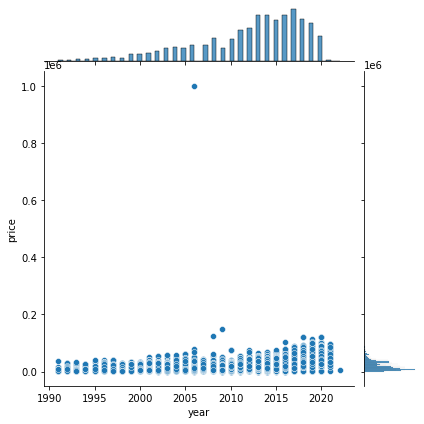

In [109]:
df_price = df_train[df_train['year']>1990].copy()
sns.jointplot(x='year',y='price',data=df_price,kind='scatter')

In [97]:
df_price.pivot_table(values=['price'], index=['year'], aggfunc='mean')

,price
year,
1991,6934.085714
1992,8666.961538
1993,6906.623377
1994,7068.616162
1995,7658.517730
1996,9942.348571
1997,7683.800000
1998,6771.000000
1999,11002.910843


Čini se da kolona year ima utjecaj na cijenu te da je cijena veća sa povećanjem vrijednosti varijable year pa ćemo sačuvati ovu varijablu. Mali postotak podataka sadrži NaN vrijednost u koloni year (0.3%), a ne vidim nijedan logičan izbor imputacije vrijednosti za ovakav tip kolone pa ću retke koji sadrže ove nedostajuće vrijednosti ukloniti iz skupa podataka.

In [110]:
df_train = df_train.dropna(subset=['year'])
df_val = df_val.dropna(subset=['year'])
df_test = df_test.dropna(subset=['year'])

### Cylinders

Sljedeće su grafovi korišteni prilikom odluke oko imputacije nepostojećih vrijenosti u koloni 'cylinders'. Pokušao sam saznati postoji li neka korelacija između kolone 'cylinders' i ostalih kolona.

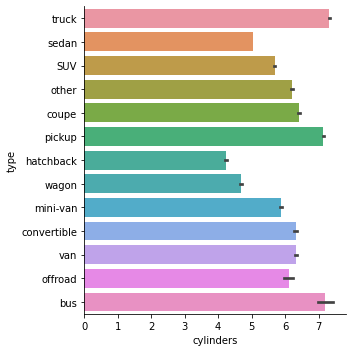

In [20]:
sns.catplot(x='cylinders',y='type',data=df_train,kind='bar')

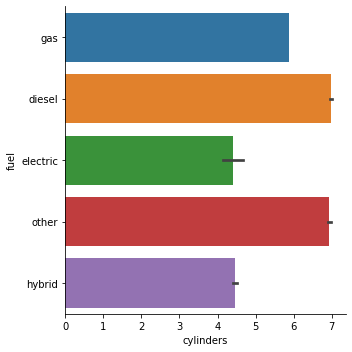

In [21]:
sns.catplot(x='cylinders',y='fuel',data=df_train,kind='bar')

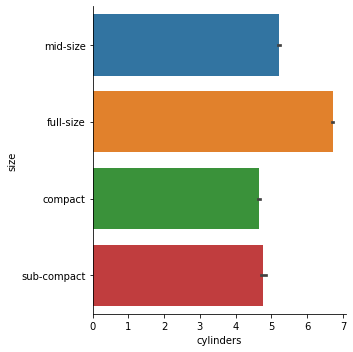

In [22]:
sns.catplot(x='cylinders',y='size',data=df_train,kind='bar')

In [23]:
df_feat['cylinders'].value_counts()

6     88164
4     72585
8     66295
5      1660
10     1170
3       603
12      200
Name: cylinders, dtype: Int64

In [99]:
cyl = df_train.groupby(['type'])['cylinders'].median()
cyl

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           8.0
hatchback       4.0
mini-van        6.0
offroad         8.0
other           8.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           6.0
Name: cylinders, dtype: Float64

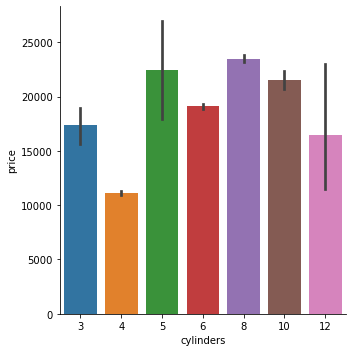

In [100]:
df_cyl = df_feat.copy()
df_cyl = df_cyl[~df_cyl['cylinders'].isna()]
sns.catplot(x='cylinders',y='price',data=df_cyl,kind='bar')

Čini se da cijena ovisi o broju cilindara u automobilu. Automobil može proizvesti veću snagu ukoliko ima više cilindara pa je koreliranost sa cijenom donekle intuitivna. Također možemo vidjeti da automobili koji su različitog tipa i veličine u prosjeku sadrže različit broj cilindara pa ću nedostajeće vrijednosti u ovoj koloni zamjeniti sa medijanom cilindara gledano prema tipu automobila. Problem je što i ta kolone ima nedostajuće vrijednosti pa ću se vratiti na ovu kolonu kasnije.

In [111]:
cyl_median = df_train['cylinders'].median()

df_train['cylinders'].fillna(cyl_median, inplace=True)
df_val['cylinders'].fillna(cyl_median, inplace=True)
df_test['cylinders'].fillna(cyl_median, inplace=True)

cyl_median

6.0

### Odometer

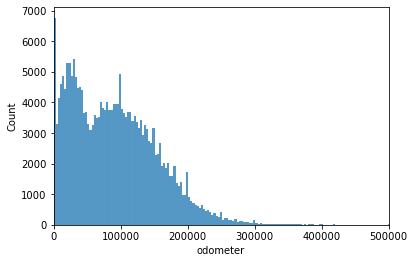

In [27]:
fig, ax = plt.subplots()
sns.histplot(df_train['odometer'], ax=ax)
ax.set_xlim(0,500000)
plt.show()

Nedostajeće vrijednosti u koloni odometer ću zamijeniti srednjom medijanom te kolone.

In [112]:
odom_median = df_train['odometer'].median()
df_train['odometer'] = df_train['odometer'].fillna(odom_median)
df_val['odometer'] = df_val['odometer'].fillna(odom_median)
df_test['odometer'] = df_test['odometer'].fillna(odom_median)
odom_median

96801.0

### Kategoričke vrijednosti

U nastavku ću pogledati kakav je odnos cijene i kategoričkih varijabli.

In [128]:
# korišteno za potrebe plotova
quant = df_train['price'].quantile([0.2,0.8])

df_plot = df_train[df_train['price']>quant[0.2]]
df_plot = df_plot[df_train['price']<quant[0.8]]

C:\Users\pebe1\AppData\Local\Temp\ipykernel_2404\3149947368.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[df_train['price']<quant[0.8]]


#### Manufacturer

In [113]:
df_feat['manufacturer'].value_counts()

KeyError: 'manufacturer'

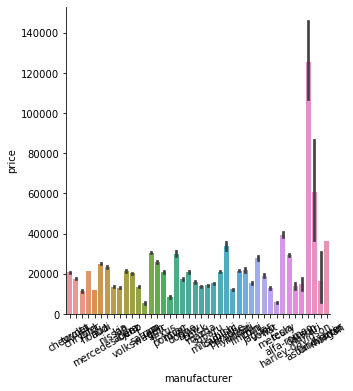

In [31]:
ax = sns.catplot(x='manufacturer',y='price', data=df_train, kind='bar')
ax.set_xticklabels(rotation=30)
plt.show()

#### Condition

In [32]:
df_train['condition'].value_counts()

good         76004
excellent    59620
like new     12638
fair          4242
new            694
salvage        364
Name: condition, dtype: int64

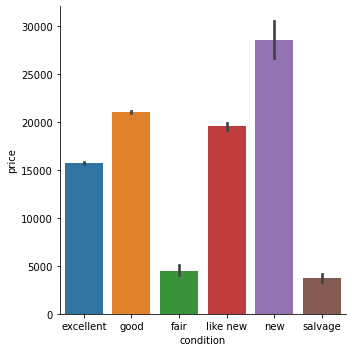

In [33]:
sns.catplot(x='condition', y='price', data=df_train, kind='bar')

Ova kolona sadrži jako velik broj nedostajućih vrijednosti, a izgleda da cijena ovisi o stanju automobila pa ću za nju iskorisiti kNN metodu nakon što imputiram vrijednosti za sve ostale kolone.

#### Fuel

In [34]:
df_train['fuel'].value_counts(normalize=True)

gas         0.842861
other       0.076666
diesel      0.063288
hybrid      0.012869
electric    0.004316
Name: fuel, dtype: float64

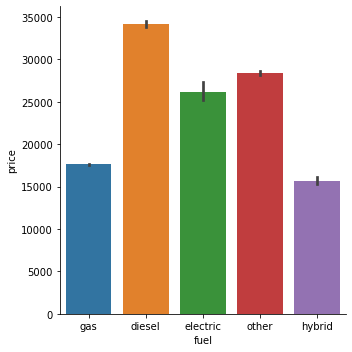

In [35]:
sns.catplot(x='fuel',y='price', data=df_train, kind='bar')

Kolona fuel sadrži malen broj NaN vrijednosti, a čak 85% vrijednosti je 'gas'. Zbog toga ću umjesto NaN vrijednosti staviti mod.

In [114]:
fuel_mode = df_train['fuel'].mode()[0]
df_train['fuel'].fillna(fuel_mode, inplace=True)

fuel_mode

'gas'

#### Type

In [116]:
df_train['type'].value_counts()

pickup         14684
truck           6690
SUV             5481
sedan           3549
coupe           1639
van             1617
other           1263
hatchback        878
convertible      582
wagon            531
mini-van         151
bus              115
offroad           28
Name: type, dtype: int64

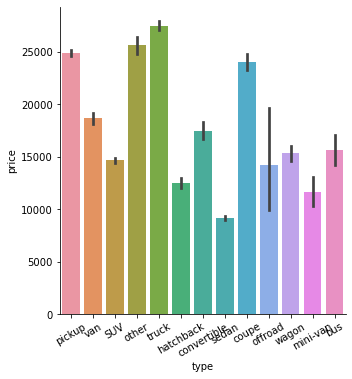

In [117]:
ax = sns.catplot(x='type',y='price', data=df_train, kind='bar')
ax.set_xticklabels(rotation=30)
plt.show()

In [118]:
df_train.groupby('type')['price'].mean()

type
SUV            14660.686006
bus            15664.495652
convertible    17471.579038
coupe          24055.813911
hatchback      12509.883827
mini-van       11670.331126
offroad        14176.357143
other          25660.773555
pickup         24889.368156
sedan           9151.416174
truck          27485.123169
van            18670.239332
wagon          15333.967985
Name: price, dtype: float64

<AxesSubplot:xlabel='type', ylabel='Count'>

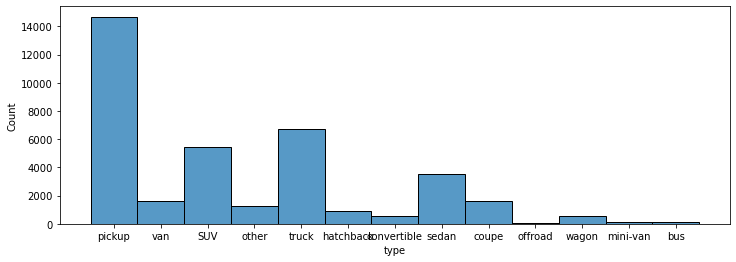

In [119]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(ax=ax, data=df_train['type'])

Cijena i tip autombila su korelirani te ću nedostjauće vrijednosti u ovoj koloni zamijeniti modom.

In [120]:
df_type = df_train['type'].fillna(df_train['type'].mode()[0]).copy()

<AxesSubplot:xlabel='type', ylabel='Count'>

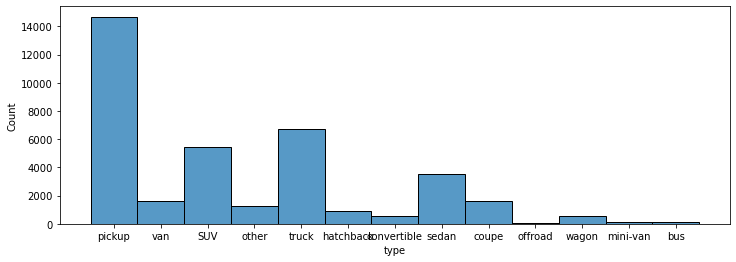

In [121]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(ax=ax, data=df_type)

Nedostajeće ću vrijednosti zamijeniti modom jer je varijabla kategoričkog tipa. U ovom je slučaju distribucija kolone 'type' malo promijenjena imputacijom što može imati utjecaj na kranju točnost predikcije cijena.

In [122]:
type_mode = df_train['type'].mode()[0]
df_train['type'] = df_train['type'].fillna(type_mode)

type_mode

'pickup'

#### Title_status

In [44]:
df_train['title_status'].value_counts()

clean         217072
rebuilt         4017
salvage         2113
lien             839
missing          336
parts only        74
Name: title_status, dtype: int64

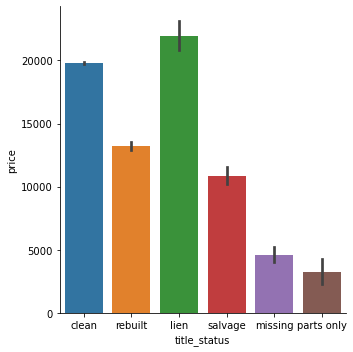

In [45]:
sns.catplot(x='title_status',y='price', data=df_train, kind='bar')

Nedostajeće vrijednosti ove kategoričke varijable također imputiram modom.

In [123]:
title_status_mode = df_train['title_status'].mode()[0]
df_train['title_status'].fillna(title_status_mode, inplace=True)

title_status_mode

'clean'

#### Transmission

In [47]:
df_train['transmission'].value_counts()

automatic    176147
other         38639
manual        13257
Name: transmission, dtype: int64

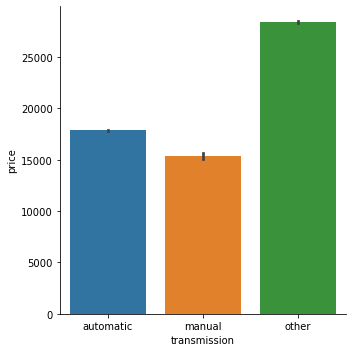

In [48]:
sns.catplot(x='transmission',y='price', data=df_train, kind='bar')

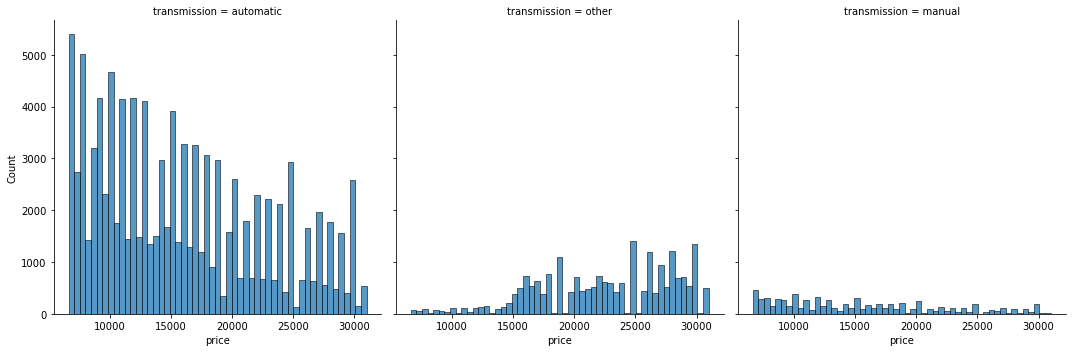

In [49]:
sns.displot(data=df_plot, x='price', col='transmission')

Čini se da ova kolona ima utjecaj na cijenu automobila pa ću ju zadržati. Kolona transmission sadrži velikom većinom vrijednost 'automatic', ima malen broj nedostajućih vrijednosti. Zbog toga ću nedostajeće vrijednosti zamijeniti sa vrijednosti 'automatic', odnosno sa modom.

In [124]:
transmission_mode = df_train['transmission'].mode()[0]
df_train['transmission'].fillna(transmission_mode, inplace=True)

transmission_mode

'automatic'

#### Drive

In [51]:
df_train['drive'].value_counts()

4wd    76121
fwd    61743
rwd    35112
Name: drive, dtype: int64

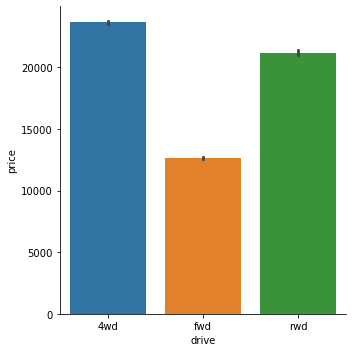

In [52]:
sns.catplot(x='drive',y='price', data=df_train, kind='bar')

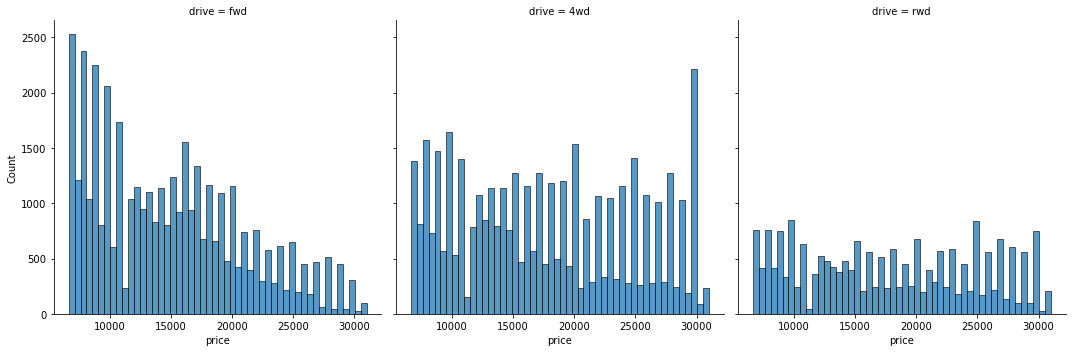

In [53]:
sns.displot(data=df_plot, x='price', col='drive')

In [125]:
df_drive_mode = df_train.groupby(['type'])['drive'].agg(pd.Series.mode)
df_drive_mode

type
SUV            4wd
bus            rwd
convertible    rwd
coupe          rwd
hatchback      fwd
mini-van       fwd
offroad        4wd
other          4wd
pickup         4wd
sedan          fwd
truck          4wd
van            rwd
wagon          fwd
Name: drive, dtype: object

Nedostajeće ću vrijednosti zamijeniti modom u ovisnoti o typu automobila jer svaki tip automobila ima drugačiju distribuciju kolone 'drive'.

In [126]:
df_train['drive'] = df_train.apply(lambda x: x['drive'] if pd.notnull(x['drive']) else df_drive_mode[x['type']], axis=1)

#### Size

In [56]:
df_train['size'].value_counts()

full-size      36610
mid-size       20317
compact        11034
sub-compact     1770
Name: size, dtype: int64

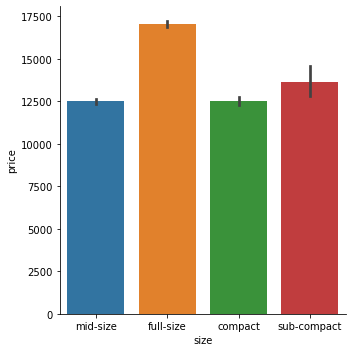

In [57]:
sns.catplot(x='size',y='price', data=df_train, kind='bar')

<AxesSubplot:xlabel='size', ylabel='price'>

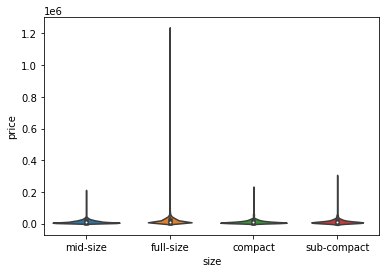

In [58]:
sns.violinplot(x='size',y='price', data=df_train)

Za potrebe vizualizacije stvorit ću skup podataka koji sadrži vrijednosti u drugom i trećem kvantilu.

In [59]:
df_train['price'].describe()

count    2.289720e+05
mean     1.950831e+04
std      1.596613e+04
min      1.010000e+02
25%      7.980000e+03
50%      1.599500e+04
75%      2.799000e+04
max      1.234567e+06
Name: price, dtype: float64

In [129]:
sns.violinplot(x='size',y='price', data=df_plot)

ValueError: Could not interpret input 'size'

Čini se da kolona size ne utječe na cijenu automobila te nju ispuštam iz skupa podataka koji će se koristiti za treniranje. 

In [127]:
df_train.drop(['size'], axis=1, inplace=True)
df_val.drop(['size'], axis=1, inplace=True)
df_test.drop(['size'], axis=1, inplace=True)

#### Condition

Kako bi mogli provesti algoritam kNN u svrhu imputacije nedostajućih vrijednosti u kolonu 'condition' potrebno je kategoričke varijable pretvoriti u one hot encoding reprezentaciju i normalzirati podatke.

Koristi se funckija get_dummies koja pretvara kolonu u indikatorske varijable. Postoji i mogućnosti pretvaranja kolone u kategorički tip, no ukoliko primjerice kolonu transmission pretvortimo u kategoričku varijablu gdje je 'automatic' označen sa 0, 'manual' sa 1 te 'other' sa 2, model bi mogao smatrati kako je 2>1>0 te da to predstavlja nekakav poredak. Da bi to izbjegli koristimo indikatorske varijable.

In [132]:
categorical_cols = ['fuel','type', 'title_status', 'transmission','drive']
num_cols = ['price', 'year', 'cylineders', 'odometer', 'posting_date']

# one hot encoding
all_data = pd.concat([df_train,df_val,df_test], axis=0)
all_data = pd.get_dummies(all_data, columns=categorical_cols)

df_train = all_data[:df_train.shape[0]]
df_val = all_data[df_train.shape[0]:df_train.shape[0] + df_val.shape[0]]
df_test = all_data[-df_test.shape[0]:]

In [133]:
df_train['condition'].value_counts()

excellent    10105
good          9938
like new      2004
fair           771
new             91
salvage         71
Name: condition, dtype: int64

In [134]:
from sklearn.impute import KNNImputer

condition_map = {'salvage':1, 'fair': 2, 'good': 3, 'excellent':4,'like new':5,'new':6}

df_train['condition'] = df_train['condition'].map(condition_map)
df_val['condition'] = df_val['condition'].map(condition_map)
df_test['condition'] = df_test['condition'].map(condition_map)

C:\Users\pebe1\AppData\Local\Temp\ipykernel_2404\3163676812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['condition'] = df_train['condition'].map(condition_map)
C:\Users\pebe1\AppData\Local\Temp\ipykernel_2404\3163676812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['condition'] = df_val['condition'].map(condition_map)
C:\Users\pebe1\AppData\Local\Temp\ipykernel_2404\3163676812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [135]:
imputer = KNNImputer(n_neighbors = 3)
df_train = pd.DataFrame(imputer.fit_transform(df_train),columns = df_train.columns)

In [137]:
df_val = pd.DataFrame(imputer.transform(df_val),columns = df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test),columns = df_train.columns)

In [138]:
X_train = df_train.drop(['price'], axis=1)
y_train = df_train['price']

X_val = df_val.drop(['price'], axis=1)
y_val = df_val['price']

X_test = df_test.drop(['price'], axis=1)
y_test = df_test['price']

In [139]:
X_train.isna().sum().sum()

0

## Treniranje modela

Problem predikcije cijene automobila je regresijski problem. On se razlikuje od klasifikacije u tome što je cilj klasifikacije pridijeliti jednu od klasa novom primjeru. S druge strane, regresijom se pokušava predvidjeti neka kontinuirana brojčana vrijednost na temelju novog primjera. U ovom je slučaju to cijena automobila. Svaka se metoda strojnog učenja sastoji od modela, objektivne funkcije i metode optimizacije. Samim time što se klasifikacijom dodjeljuje klasa nekom primjeru, a regresijom se predviđa brojčana vrijednost, njihove će objektivne funckije (model) i funkcije pogreške biti različite. Primjerice postoji SVM za klasifikaciju i za regresiju gdje je onaj za regresiju ima objektivnu funkciju koja je dodatno prilagođena za problem regresije.

Postoje razni regresijski modeli, od kojih su neki: linearna regresija, LS-SVM i regresijsko stablo odluke. Odlučujem se za linearnu regresiju. Kako bi ovaj model mogao raditi za kategoričkim varijablama potrebno ih je nekako pretvoriti u numeričke vrijednost. To je učinjeno u prethodnim koracima pomoću get_dummies funkcije. Tako će model moći naučiti važnost svake kategoričke varijable i tako odrediti vrijednost pripadajućih parametara.

### Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_hat = model.predict(X_val)

In [141]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_hat)


print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  11877.216241805718


### Polynomial Regression

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(X_train)
# poly_features_val = poly.transform(X_val)

In [ ]:
# poly_model = LinearRegression().fit(poly_features[:100000], y_train[:100000])
# y_hat_poly = poly_model.predict(poly_features_val)

# mse = mean_squared_error(y_val, y_hat_poly)
# r2 = r2_score(y_val, y_hat_poly)

# print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

### Gradient Boosting Regressor

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=0.1, random_state=42).fit(X_train,y_train.ravel())
y_hat_grad = grad_model.predict(X_val)

mse = mean_squared_error(y_val, y_hat_grad)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  6018.467667143908


In [ ]:
# from sklearn.svm import SVR

# svr_model = SVR().fit(X_train, y_train.ravel())
# y_hat_svr = svr_model.predict(X_val)

# mse = mean_squared_error(y_val, y_hat_svr)
# r2 = r2_score(y_val, y_hat_svr)

# print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

### Standardizacija podataka

In [143]:
from sklearn.preprocessing import StandardScaler

# normalizacija
scaler = StandardScaler()

df_train_stand = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns).copy()
df_val_stand = pd.DataFrame(scaler.fit_transform(df_val), columns = df_train.columns).copy()
df_test_stand = pd.DataFrame(scaler.fit_transform(df_test), columns = df_train.columns).copy()

X_train_stand = df_train_stand.drop(['price'], axis=1)
y_train_stand = df_train_stand['price']

X_val_stand = df_val_stand.drop(['price'], axis=1)
y_val_stand = df_val_stand['price']

X_test_stand = df_test_stand.drop(['price'], axis=1)
y_test_stand = df_test_stand['price']

### Linearna regresija na standardiziranim podacima

In [144]:
model = LinearRegression().fit(X_train_stand, y_train_stand)
y_hat = model.predict(X_val_stand)

mse = mean_squared_error(y_val_stand, y_hat)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  240310667586.64172


In [145]:
grad_model = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=0.1, random_state=42).fit(X_train_stand,y_train_stand.ravel())
y_hat_grad = grad_model.predict(X_val_stand)

mse = mean_squared_error(y_val_stand, y_hat_grad)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))

Root Mean Squared Erorr (RMSE):  0.48543211740636855


In [ ]:
# SVR
# plotat predvidene i prave cijene